# 5. 모델 평가와 성능 향상
# Model Evaluation and Improvement

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display

## 5.1 교차 검증 - Cross-Validation

* **교차 검증(Cross-Validation)**은 데이터를 여러번 반복해서 나누고 그 데이터를 가지고 모델을 여러번 학습함
* 가장 널리 사용되는 교차 검증 방법은 **$k$-Fold Cross-Validation**이며 $k$는 보통 **5** 또는 **10**을 사용
* 예를 들어, **5-fold CV**인 경우, 아래의 그림과 같이 비슷한 크기의 *부분 집합* 을 다섯 개로 나눈 뒤 그 중 하나는 __Test set__으로 나머지 4 개는 __Training set__으로 사용하여 정확도를 평가함

/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/matplotlib/pyplot.py:2669: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


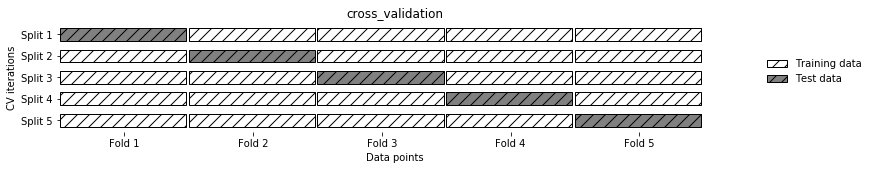

In [3]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증
* sklearn.model_selection.[cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) 함수로 구현되어 있음
* **Parameters**:
    * **estimator**: 평가하기 위한 모델
    * **X**: Training set
    * **y**: Training set Label
    * **cv**: K-fold 에서 K 설정 하는 파라미터 (default=3)

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [5]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validataion score: {}".format(scores))

Cross-validataion score: [ 0.96078431  0.92156863  0.95833333]


In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validataion score: {}".format(scores))

Cross-validataion score: [ 1.          0.96666667  0.93333333  0.9         1.        ]


보통 정확도는 Cross-Validation의 평균을 사용함

In [7]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


### 5.1.2 교차 검증의 장점
데이터를 단순히 Training set과 Test set으로 한 번 나누는 것보다 교차 검증(Cross validation)을 사용하면 몇 가지 장점이 있다.
* Test set에 각 샘플이 한번씩 들어가기 때문에 교차 검증의 점수를 높이기 위해서는 데이터 셋의 모든 샘플에 대해 모델이 일반화가 잘 되어야 한다.
* 데이터를 여러 샘플로 나누게 되면 모델이 Training set에 얼마나 민감한지 알 수 있다.
* 데이터를 효과적으로 사용할 수 있다. 단순히 Training set 과 Test set을 나누어 모델을 학습 시키는 것보다 5-fold CV는 $\frac{4}{5}$ 즉 80%, 10-fold CV 경우 $\frac{9}{10}$ 즉 90%를 모델 학습에 사용할 수 있다.

하지만, 교차검증의 단점은 연산비용이 늘어나는 것이다. 모델을 $k$개 만들어야 하므로 데이터를 한번만 나눴을 때 보다 약 $k$배 더 느리다.

### 5.1.3 계층별(Straified) $k$-fold CV와 그외 전략들
k-fold CV를 사용할 경우 데이터 셋을 나열 순서대로 CV를 적용하는 것은 좋지않은 결과를 가져올 수 있다.

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
print('Iris labels:\n{}'.format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
print("교차 검증 점수:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 0.  0.  0.]


위의 출력에서 볼 수 있듯이 클래스 별로 나열 되어있다. 이럴 경우에 3-fold CV를 할 경우 제대로 학습이 되지 않게 된다. <br />
단순한 $k$-fold CV 보다는 Stratified $k$-fold cross-validation을 사용할 수 있다. sckit-learn에서 [`StratifiedKFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)를 제공한다. 

/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:163: Ma

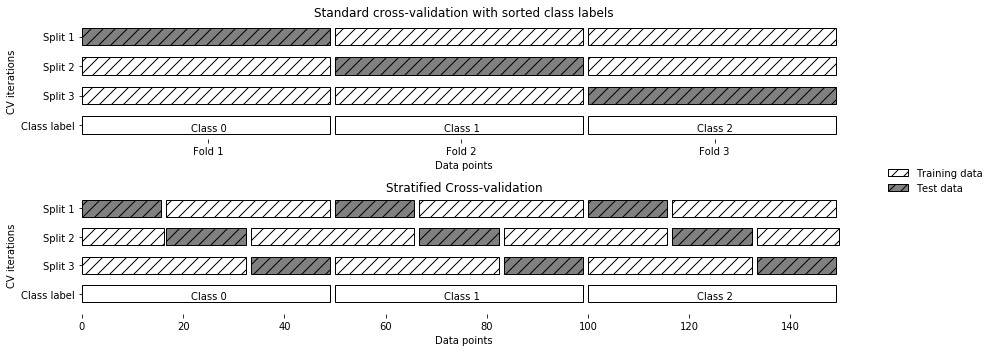

In [10]:
mglearn.plots.plot_stratified_cross_validation()

### 교차 검증 상세 옵션
sklearn.model_selection.[KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)
* __n_splits__ : int, default=3
    * Number of folds. Must be at least 2.
* __shuffle__ : boolean, optional
    * Whether to shuffle the data before splitting into batches.

In [11]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [12]:
print("교차 검증 점수:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 0.9   0.96  0.96]


### LOOCV(Leave-One-Out Cross-Validation)
또 다른 교차검증(CV)방법으로 **LOOCV**도 자주 사용한다. <br />
LOOCV는 의미 그대로 데이터셋에서 **데이터 포인트 하나만** Test set으로 사용하고 나머지 데이터는 Training set으로 사용하는 방법이다. 데이터셋 전체를 각각 하나씩 테스트 해야하므로 시간은 오래걸리지만 작은 데이터셋에서 좋은 결과를 내기도 한다.

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import mglearn
from IPython.display import display

In [15]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

In [16]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('CV 분할 횟수:', len(scores))
print('Avg. score: {:.2f}'.format(scores.mean()))

CV 분할 횟수: 150
Avg. score: 0.95


### 임의 분할 교차검증 Shuffle-split Cross-Validation
또 다른 CV 방법으로는 **shuffle-split cross-validation** 이 있다. <br />
`train_size`만큼을 Training set으로 만들고, Training set과 중복되지 않는 `test_size`만큼을 Test set으로 만들어 주고 이 방법을 `n_splits` 횟수 만큼 반복하는 방법이다.<br />
* __ShuffleSplit__ 방법은 반복 횟수를 Training set나 Test set의 크기와 독립적으로 조절해야 할 때 유용하다. 
* train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용할 수 있다.
* 데이터 사이즈가 클 경우 적용할 수 있다.

/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


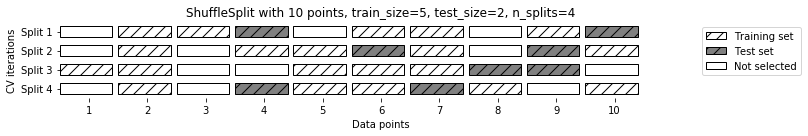

In [17]:
mglearn.plots.plot_shuffle_split()

아래의 코드는 데이터셋의 50%를 Training set, 50%를 Test set으로 나누어 10번 반복한 예제이다.

In [18]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("CV score:\n{}".format(scores))

CV score:
[ 0.97333333  0.96        0.84        0.81333333  0.94666667  0.89333333
  0.92        0.97333333  0.93333333  0.86666667]


### 그룹별 교차 검증
데이터 안에 매우 연관된 그룹이 있을 때도 CV를 사용한다. 예를 들어 의료 관련 데이터 인 경우 같은 환자로 부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화 하는 것이 목적일 경우 사용할 수 있다.

In [19]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 그룹을 지정
#  - 처음 세 개의 샘플은 같은 그룹에 속하고
#  - 다음은 네 개의 샘플이 같은 그룹에 속한다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("CV score:\n{}".format(scores))

CV score:
[ 0.75        0.8         0.66666667]


/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:33: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor="k", align='edge')
/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/mglearn/plot_cross_validation.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align="edge")


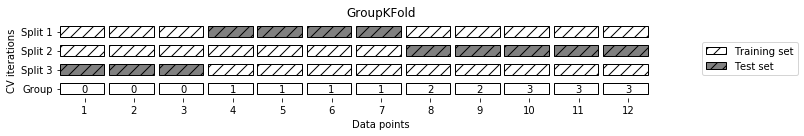

In [20]:
mglearn.plots.plot_group_kfold()

## 5.2 그리드 서치(Grid Search)
모델에서 중요한 매개변수(parameter, 성능을 최대로 높여주는) 값을 찾는 일은 어려운 작업이지만, 모든 모델과 데이터셋에 해야하는 필요한 작업이다. <br />
scikit-learn에서는 이러한 작업을 쉽게할 수 있도록 __Grid Search__ 방법을 제공한다. Grid Search는 매개변수들을 대상으로 가능한 모든 조합을 적용해 보는 방법이다.

### 5.2.1 간단한 그리드 서치
두 매개변수 조합에 대해 분류기를 학습시키고 평가하는 간단한 그리드 서치를 `for`문을 사용해서 만들어 볼 수 있다.

In [21]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('Training set의 크기: {}  Test set의 크기: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킴
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # Test set로 SVC를 평가함
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print('Best score: {:.2f}'.format(best_score))
print('Optimal Parameters: {}'.format(best_parameters))

Training set의 크기: 112  Test set의 크기: 38
Best score: 0.97
Optimal Parameters: {'gamma': 0.001, 'C': 100}


### 5.2.2 매개변수 과대적합과 검증 세트
매개변수(parameter)가 적절한지 검증할 경우 Training set과 Test set외의 Validation set이 별도로 필요하다. 즉, 데이터셋을 Training, Validation, Test set 세 개의 세트로 분리하여 매개변수의 성능을 테스트 할 수 있다.

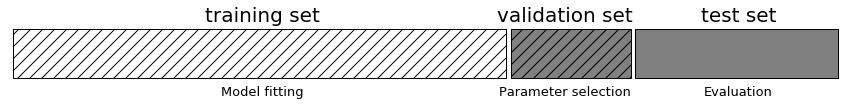

In [22]:
mglearn.plots.plot_threefold_split()

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 데이터를 훈련+검증 세트와 테스트셋으로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# 위의 훈련+검증 셋을 Training set과 Validation set으로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print('Training set 크기: {}  Validation set 크기: {}  Test set 크기: {}'
      '\n'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킴
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # Validation set로 SVC를 평가함
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# Training set과 Validation set을 합쳐 모델을 다시 만든 후
# Test set을 이용해 모델을 평가함
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
            
print('Validation set에서 최고 점수: {:.2f}'.format(best_score))
print('Optimal Parameters: {}'.format(best_parameters))
print('Optimal Parameter에서 Test set 점수: {:.2f}'.format(test_score))

Training set 크기: 84  Validation set 크기: 28  Test set 크기: 38

Validation set에서 최고 점수: 0.96
Optimal Parameters: {'gamma': 0.001, 'C': 10}
Optimal Parameter에서 Test set 점수: 0.92


### 5.2.3 교차 검증(CV)를 사용한 그리드 서치
각 매개변수 마다 교차검증을 시행한다.

In [24]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킴
        svm = SVC(gamma=gamma, C=C)
        # Cross-Validation을 적용
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # CV 정확도의 평균을 계산
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma':gamma}
# Training set와 Validation set를 합쳐 모델을 다시 만듦
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
            
print('Validation set에서 최고 점수: {:.2f}'.format(best_score))
print('Optimal Parameters: {}'.format(best_parameters))
print('Optimal Parameter에서 Test set 점수: {:.2f}'.format(test_score))

Validation set에서 최고 점수: 0.97
Optimal Parameters: {'gamma': 0.01, 'C': 100}
Optimal Parameter에서 Test set 점수: 0.97


/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Us

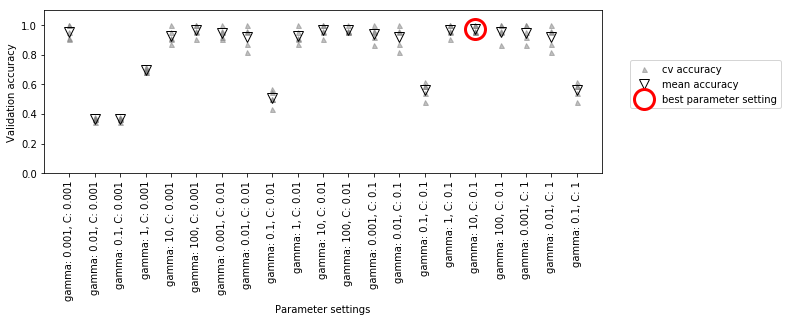

In [25]:
mglearn.plots.plot_cross_val_selection()

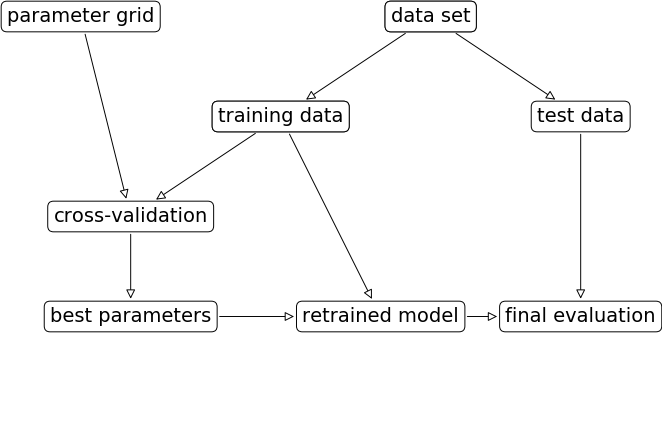

In [26]:
mglearn.plots.plot_grid_search_overview()

scikit-learn은 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)를 제공하여 교차검증을 사용한 그리드 서치를 쉽게 수행할 수 있다. <br />
GridSearchCV를 사용하기 위해서는 먼저 딕셔너리 형태의 검색 대상 매개변수를 지정해야 한다.

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('매개변수 그리드:\n{}'.format(param_grid))

매개변수 그리드:
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


그런 다음, 모델(여기서는 SVC), 검색 대상 매개변수 그리드(param_grid), 원하는 교차검증($5$-fold CV)로 GridSearchCV의 객체를 생성한다.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

GridSearchCV의 객체인 `grid_search`는 분류기와 비슷해서 `fit, predict, score` 메소드를 제공한다. <br />
`fit`메소드를 호출하면 `param_grid`에 설정된 매개변수 조합에 대한 교차검증을 수행한다.

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

GridSearchCV 객체의 `fit`메소드는 최적의 매개변수를 찾을 뿐만아니라, 교차검증 성능이 가장 좋은 매개변수로 전체 Training set에 대해 새로운 모델을 자동으로 만든다.

In [31]:
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [32]:
print("최적 매개변수: {}".format(grid_search.best_params_))
print("최상 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'gamma': 0.01, 'C': 100}
최상 교차 검증 점수: 0.97


GridSerchCV에서 `score`메소드는 전체 Training set에서 학습한 모델에 대한 점수이다. `best_score_`속성에는 Training set에서 수행한 교차검증의 평균 정확도가 저장된다.

In [33]:
print('최고 성능 모델:\n{}'.format(grid_search.best_estimator_))

최고 성능 모델:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### 교차 검증 결과 분석
그리드 서치는 계산 시간(비용)이 매우 크므로 비교적 간격을 넓게하여 적은 수의 그리드로 시작하는 것이 좋다.<br />
그리드 서치의 결과는 검색과 관련한 여러 정보가 함께 저장되어 있는 딕셔너리인 `cv_results_`속성에 담겨 있다.

In [34]:
import pandas as pd
# DataFrame으로 변환한다.
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 행을 출력
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001176,0.000515,0.366071,0.366079,0.001,0.001,"{'gamma': 0.001, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000245,0.000108,0.011371,0.002852
1,0.000712,0.000305,0.366071,0.366079,0.001,0.01,"{'gamma': 0.01, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000047,0.000016,0.011371,0.002852
2,0.000968,0.000455,0.366071,0.366079,0.001,0.1,"{'gamma': 0.1, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000237,0.000091,0.011371,0.002852
3,0.001218,0.000628,0.366071,0.366079,0.001,1,"{'gamma': 1, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000267,0.000227,0.011371,0.002852
4,0.001222,0.000500,0.366071,0.366079,0.001,10,"{'gamma': 10, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000461,0.000115,0.011371,0.002852


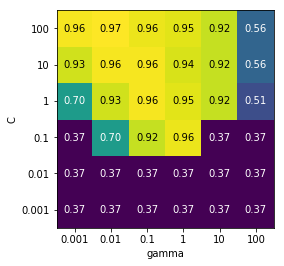

In [35]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

### 중첩 교차 검증 Nested Cross-Validation
위의 GridSearchCV를 사용할 때는 Training set과 Test set을 한 번만 나누기 때문에, 결과가 불안정하고 테스트 데이터의 분할에 크게 의존한다. 이런 경우에 __중첩 교차 검증(nested cross-validation)__을 사용할 수 있다. <br />
Nested cross-validation에서는 먼저 Training/Test set을 나눈뒤 각 Training set에 대해 GridSearch를 시행한다(?). 이 방법은 모델이나 파라미터 설정이 아닌 테스트 점수의 리스트를 만들어 준다. 이 점수들은 Grid Search를 통해 찾은 최적의 파라미터가 모델을 얼마나 잘 일반화 하는지 알려준다. 새로운 데이터에 적용할 모델을 만드는 것이 아니라, 주어진 모델이 얼마나 잘 일반화 되는지 평가하는데 유용한 방법이다.  

In [36]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())
print(param_grid)

교차 검증 점수:  [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
교차 검증 평균 점수:  0.98
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


## 5.3 평가 지표와 측정

### 5.3.1 최종 목표를 기억하라

### 5.3.2 이진 분류의 평가 지표

### 에러의 종류
* __Type 1 error(1종 오류)__: 실제 값이 참(True)인데, 거짓(False)라고 판별하는 경우 $\Longrightarrow$ *False Positive(FP)*
* __Type 2 error(2종 오류)__: 실제 값이 거짓(False)인데, 참(True)라고 판별하는 경우 $\Longrightarrow$ *False Negative(FN)*

| Predict/Actual |            P             |             N             |
| :------------: | :----------------------: | :-----------------------: |
|       P        | True Positive<br />(TP)  | False Negatives<br />(FN) |
|       N        | False Positive<br />(FP) |  True Negative<br />(TN)  |

### 불균형 데이터셋

In [43]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [44]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [45]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [46]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.83
logreg 점수: 0.98


### 오차 행렬 Confusion Matrix
오차행렬(Confusion Matrix)는 이진 분류 평가 결과를 나타낼 때 가장 많이 사용하는 방법 중 하나이다.

In [47]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[401   2]
 [  8  39]]


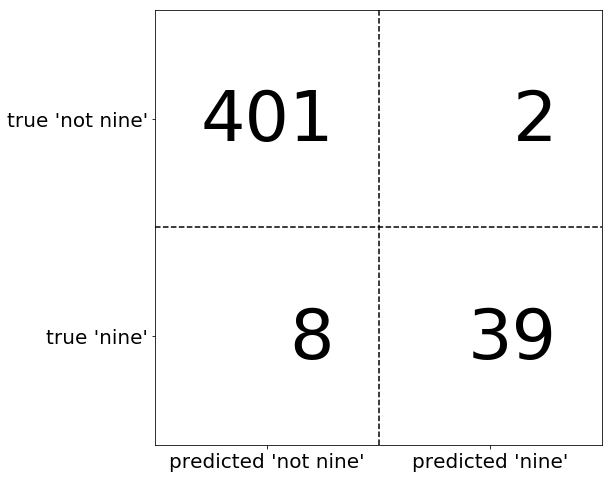

In [48]:
mglearn.plots.plot_confusion_matrix_illustration()

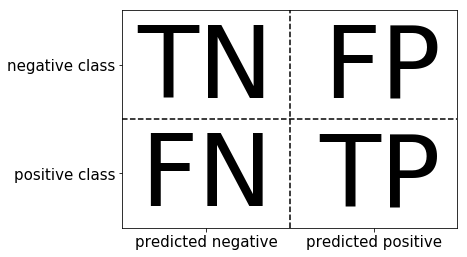

In [49]:
mglearn.plots.plot_binary_confusion_matrix()

In [50]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[373  30]
 [ 44   3]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[401   2]
 [  8  39]]


### 정확도와의 관계
| Predict/Actual |            P             |             N             |
| :------------: | :----------------------: | :-----------------------: |
|       P        | True Positive<br />(TP)  | False Negatives<br />(FN) |
|       N        | False Positive<br />(FP) |  True Negative<br />(TN)  |
$$정확도=\frac{TP + TN}{TP+TN+EP+FN}$$

### 정밀도(Precision), 재현율(Recall), F-Score
$$Precision=\frac{TP}{TP+FP}$$

$$Recall=\frac{TP}{TP+FN}$$

$$F-Score=2\times \frac{precision\cdot recall}{precision+recall}$$

In [51]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.07
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

             precision    recall  f1-score   support

       9 아님       0.90      1.00      0.94       403
          9       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/cjh/miniconda3/envs/study/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

             precision    recall  f1-score   support

       9 아님       0.89      0.93      0.91       403
          9       0.09      0.06      0.07        47

avg / total       0.81      0.84      0.82       450

